# 📊 Evolutionary TSP - Deney Sonuçları Analizi

Bu notebook, `results/hall_of_fame.json` dosyasında biriken deney sonuçlarını görselleştirir ve analiz eder.

### Hedefler:
1. Farklı stratejilerin (Hızlı İzci, Ağır Silah vb.) performansını kıyaslamak.
2. Süre ve Başarı arasındaki ilişkiyi görmek.
3. Algoritmanın optimal sonuca ne kadar yaklaştığını (Gap %) incelemek.

In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Grafikler için stil ayarı
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Kontrol edilecek tüm olası yollar
POSSIBLE_PATHS = [
    "../results/hall_of_fame.json",      # Bir üst dizindeki results
    "../src/results/hall_of_fame.json",  # src içindeki results
    "results/hall_of_fame.json",         # Mevcut dizindeki results
    "hall_of_fame.json"                  # Direkt yanındaki dosya
]

all_data = [] # Tüm verileri burada toplayacağız
found_files = [] # Hangi dosyaları bulduğumuzu loglayalım

for path in POSSIBLE_PATHS:
    if os.path.exists(path):
        try:
            with open(path, "r", encoding="utf-8") as f:
                file_content = json.load(f)
                
                # Eğer içerik doluysa listeye ekle
                if isinstance(file_content, list) and len(file_content) > 0:
                    all_data.extend(file_content) # <--- ÖNEMLİ: Listeleri birleştiriyoruz
                    found_files.append(path)
                    print(f"Veri eklendi: {path} ({len(file_content)} kayıt)")
        except Exception as e:
            print(f"Hata oluştu ({path}): {e}")

if len(all_data) > 0:
    # Tüm verilerden tek bir DataFrame oluştur
    df = pd.DataFrame(all_data)
    
    # --- TEMİZLİK VE TÜR DÖNÜŞÜMLERİ ---
    
    # Sayısal olmayan verileri temizle (Örn: "2.15%" -> 2.15)
    if 'gap_to_optimal' in df.columns:
        df['gap_numeric'] = df['gap_to_optimal'].astype(str).str.replace('%', '').replace('Unknown', None).astype(float)
    
    if 'improvement_pct' in df.columns:
        df['imp_numeric'] = df['improvement_pct'].astype(str).str.replace('%', '').astype(float)

    # Tarih formatı
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Aynı deneyi (timestamp ve run_name aynı olan) iki kere eklememek için duplicate kontrolü
    before_dedup = len(df)
    df.drop_duplicates(subset=['timestamp', 'run_name'], keep='last', inplace=True)
    
    print(f"\n📊 TOPLAM SONUÇ: {len(found_files)} dosyadan {len(df)} eşsiz deney kaydı yüklendi.")
    display(df.head())
    
else:
    print("HATA: Hiçbir konumda 'hall_of_fame.json' bulunamadı veya dosyalar boş!")

Veri eklendi: ../results/hall_of_fame.json (2 kayıt)
Veri eklendi: ../src/results/hall_of_fame.json (10 kayıt)

📊 TOPLAM SONUÇ: 2 dosyadan 12 eşsiz deney kaydı yüklendi.


,timestamp,run_name,dataset,num_cities,final_distance,initial_distance,improvement_pct,time_elapsed_sec,best_found_at_gen,total_generations,gap_to_optimal,parameters,methods,gap_numeric,imp_numeric
0,2025-12-30 03:26:44,deneme,berlin52,52,8533.11,25512.66,66.55%,10.27,770,780,13.14%,"{'pop_size': 310, 'generations': 780, 'mutatio...","{'selection': 'roulette', 'crossover': 'cycle'...",13.14,66.55
1,2025-12-30 03:25:31,Anonim Gezgin,att532,532,444914.70,1515084.37,70.63%,30.22,992,994,1507.00%,"{'pop_size': 198, 'generations': 994, 'mutatio...","{'selection': 'tournament', 'crossover': 'orde...",1507.00,70.63
2,2025-12-30 02:16:38,Deney 4: Agir Silah 3-Opt (Berlin52),berlin52,52,7704.09,25377.01,69.64%,1.64,299,300,2.15%,"{'pop_size': 100, 'generations': 300, 'mutatio...","{'selection': 'tournament', 'crossover': 'orde...",2.15,69.64
3,2025-12-30 02:17:08,Deney 5: Grandmaster (Berlin52),berlin52,52,8268.88,24815.63,66.68%,8.42,602,1000,9.64%,"{'pop_size': 200, 'generations': 1000, 'mutati...","{'selection': 'tournament', 'crossover': 'orde...",9.64,66.68
4,2025-12-30 02:14:59,Deney 1: Hizli Izci (Berlin52),berlin52,52,8376.65,25573.90,67.25%,0.46,197,200,11.07%,"{'pop_size': 50, 'generations': 200, 'mutation...","{'selection': 'tournament', 'crossover': 'orde...",11.07,67.25


## 1. Veri Setine Göre Performans Sıralaması
Her harita (berlin52, att532) kendi içinde değerlendirilmelidir. Aşağıdaki grafik, her veri seti için en iyi skoru yapan deneyleri sıralar.

C:\Users\dimoontri\AppData\Local\Temp\ipykernel_12904\3927709101.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='final_distance', y='run_name', data=subset, palette='viridis')


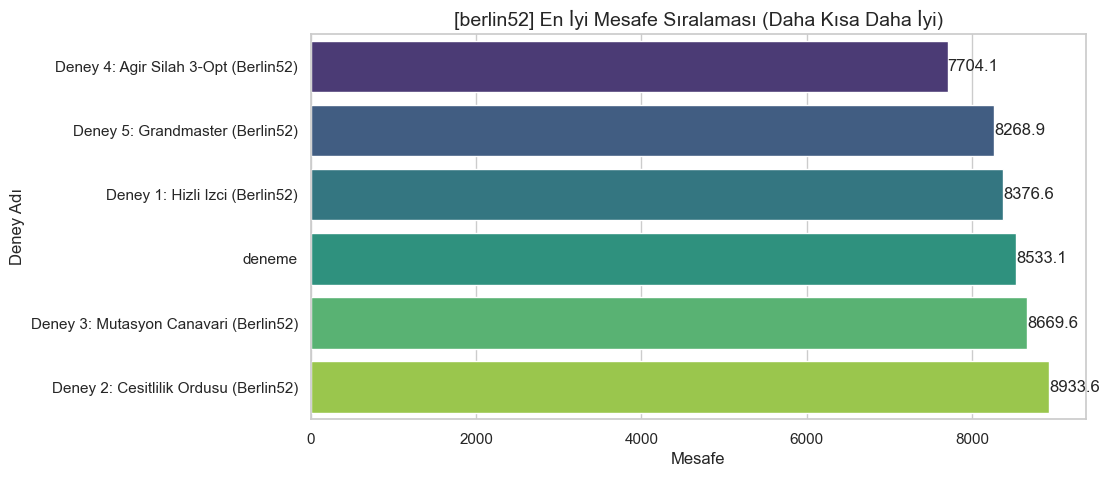

C:\Users\dimoontri\AppData\Local\Temp\ipykernel_12904\3927709101.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='final_distance', y='run_name', data=subset, palette='viridis')


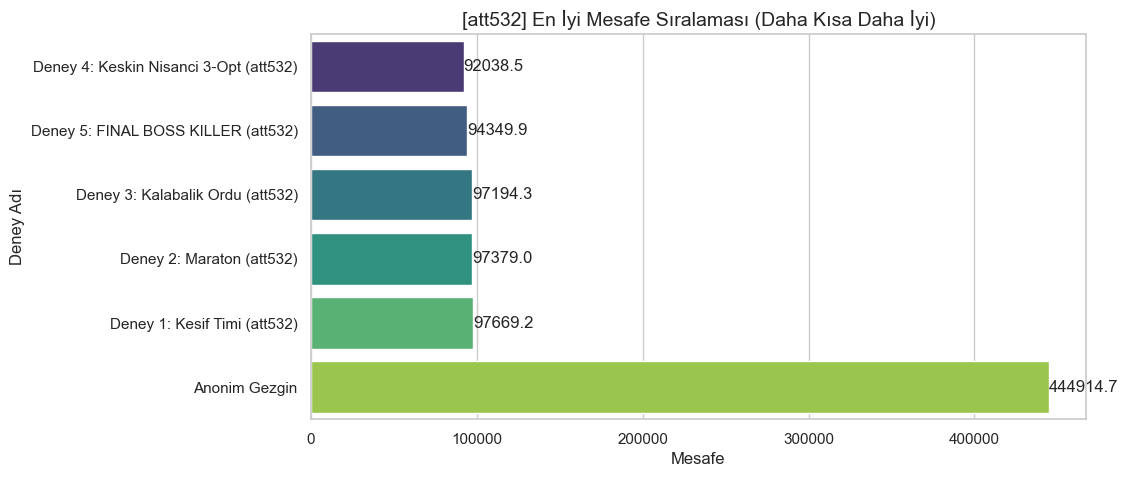

In [7]:
# Veri setlerine göre gruplayalım
datasets = df['dataset'].unique()

for ds in datasets:
    subset = df[df['dataset'] == ds].sort_values(by='final_distance')
    
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x='final_distance', y='run_name', data=subset, palette='viridis')
    
    plt.title(f"[{ds}] En İyi Mesafe Sıralaması (Daha Kısa Daha İyi)", fontsize=14)
    plt.xlabel("Mesafe")
    plt.ylabel("Deney Adı")
    
    # Barların ucuna değerleri yaz
    for i in ax.containers:
        ax.bar_label(i, fmt='%.1f')
        
    plt.show()

## 2. Süre vs Başarı Analizi (Efficiency)
Hangi deney hem hızlı hem de başarılıydı? Sol alt köşeye yakın olan noktalar **en verimli** olanlardır.

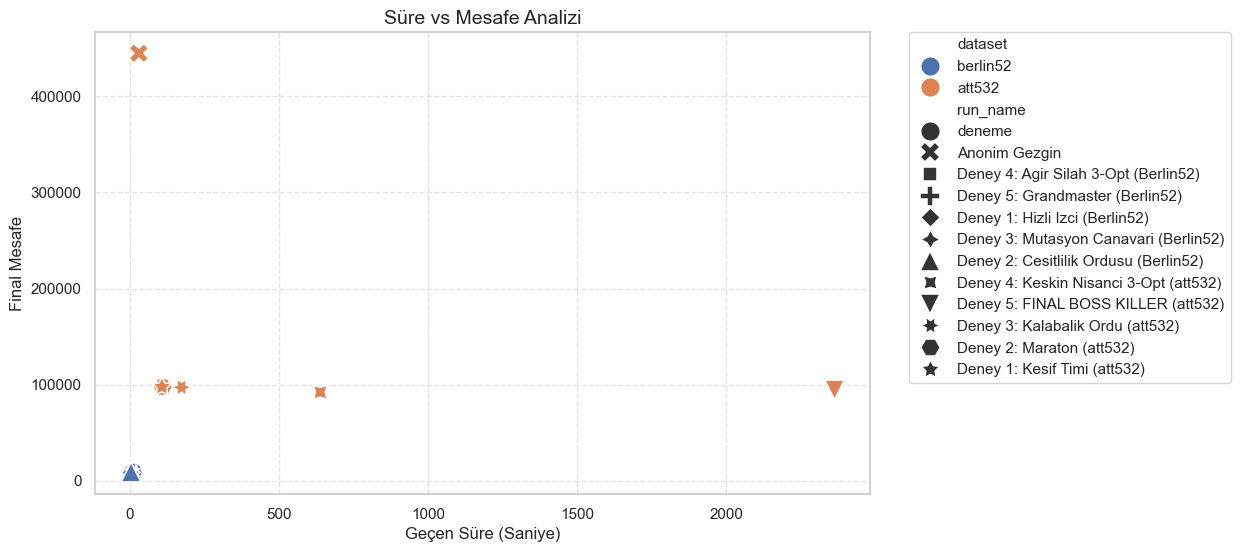

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='time_elapsed_sec', 
    y='final_distance', 
    hue='dataset', 
    style='run_name', 
    s=200, 
    palette='deep'
)

plt.title("Süre vs Mesafe Analizi", fontsize=14)
plt.xlabel("Geçen Süre (Saniye)")
plt.ylabel("Final Mesafe")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3. Optimal Gap Analizi (%)
Algoritmamız dünya rekoruna (Optimal) ne kadar yaklaştı? Çubuğun kısa olması daha iyidir (%0 = Rekor).

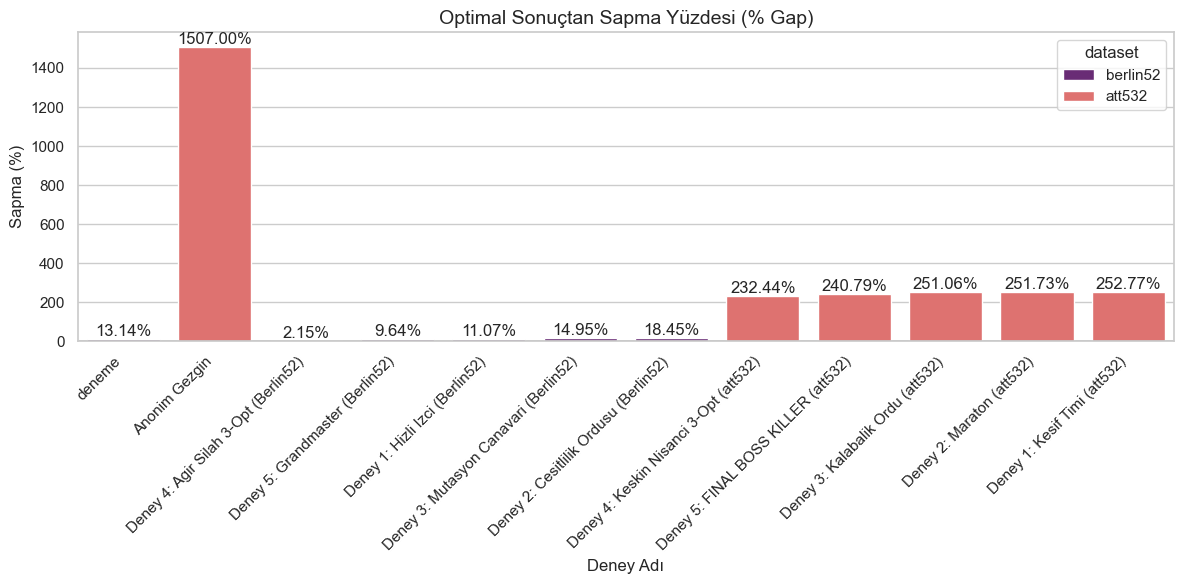

In [9]:
# Sadece gap değeri hesaplanabilmiş olanları al
gap_df = df.dropna(subset=['gap_numeric'])

if not gap_df.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        x='run_name', 
        y='gap_numeric', 
        hue='dataset', 
        data=gap_df, 
        palette='magma'
    )
    
    plt.title("Optimal Sonuçtan Sapma Yüzdesi (% Gap)", fontsize=14)
    plt.ylabel("Sapma (%)")
    plt.xlabel("Deney Adı")
    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='black', linewidth=1)
    
    # Barların üzerine yüzdeyi yaz
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')
        
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Gap analizi için yeterli veri yok (Optimal değerler girilmemiş olabilir).")

## 4. İyileştirme Oranı (Initial vs Final)
Algoritma başlangıçtaki rastgele rotayı ne kadar düzeltti? Kırmızı kısım algoritmanın kazandırdığı mesafedir.

In [ ]:
# Veriyi 'Melt' ederek uzun formata çevirelim (Bar plot için)
melted_df = df.melt(id_vars=['run_name', 'dataset'], value_vars=['initial_distance', 'final_distance'], var_name='Type', value_name='Distance')

plt.figure(figsize=(12, 6))
sns.barplot(x='run_name', y='Distance', hue='Type', data=melted_df, palette=['lightgray', 'green'])

plt.title("Başlangıç vs Bitiş Mesafesi (Ne Kadar İyileşti?)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Mesafe")
plt.legend(title='Durum', labels=['Başlangıç (Rastgele)', 'Final (Optimize Edilmiş)'])

plt.tight_layout()
plt.show()